In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os 
import pickle
%matplotlib inline


In [9]:
def read_from_file(name): 
    path = os.getcwd() + '/AneurysmGeneration/pickles/' + name + '.pkl'
    file = open(path, 'rb')
    new_obj = pickle.load(file)
    file.close()
    return new_obj


In [47]:
results = read_from_file('second_flows_dict')

In [48]:
all_second_flows, areas = results['p1']

In [61]:
all_second_flows = np.array(all_second_flows)
print(all_second_flows.shape)
print(len(areas))
print(np.divide(all_second_flows, np.array(areas).reshape(len(areas), 1)).shape)
all_second_flows = np.divide(all_second_flows, np.array(areas).reshape(len(areas), 1))

(6, 21)
6
(6, 21)


Text(0,0.5,'I2 numerator')

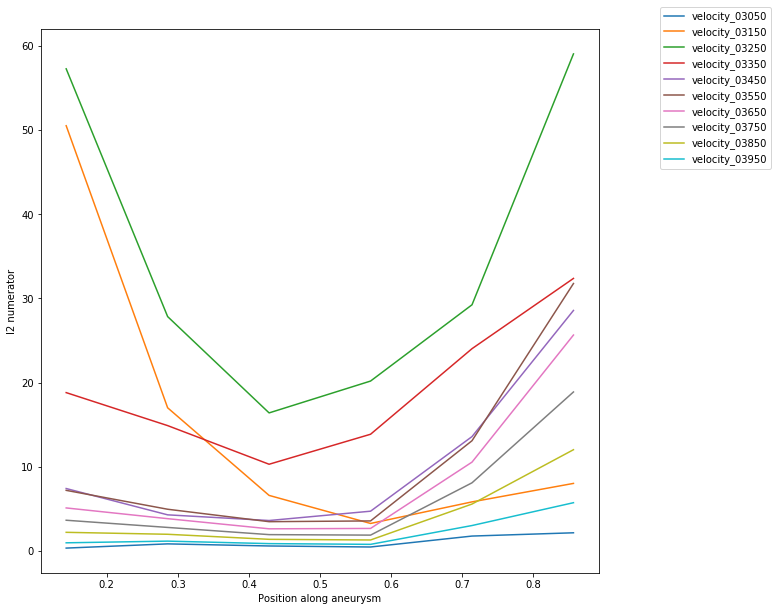

In [62]:
positions = 6
interval = 1./(positions+1)
x_pos = [i*interval for i in range(1, positions+1)]

step_lower = 3000
step_upper = 4000
tstep = 50
steps = np.arange(step_lower, step_upper + tstep, tstep)

step_labels = ['velocity_0' + str(step) for step in steps]

fig = plt.figure(figsize=(10,10))
for i, (second_flow, label) in enumerate(zip(np.transpose(all_second_flows), step_labels)): 
    if i % 2 == 0: 
        continue
    plt.plot(x_pos, second_flow, label = label)

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Position along aneurysm')
plt.ylabel('I2 numerator')

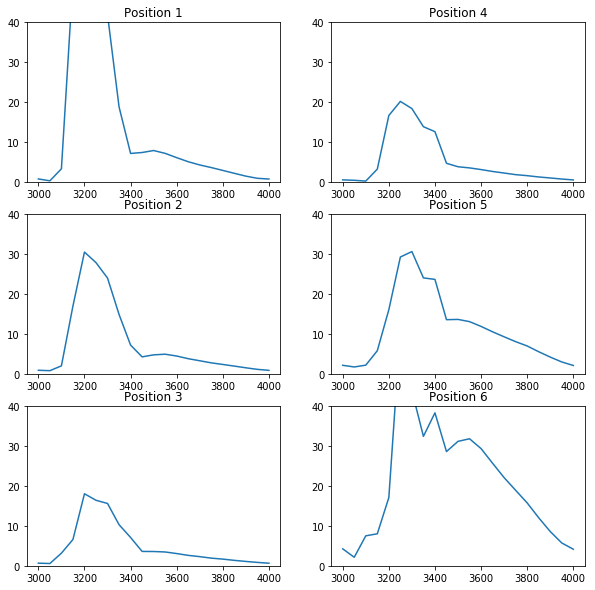

In [64]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
axs[0,0].plot(steps, all_second_flows[0,:])
axs[1,0].plot(steps, all_second_flows[1,:])
axs[2,0].plot(steps, all_second_flows[2,:])
axs[0,1].plot(steps, all_second_flows[3,:])
axs[1,1].plot(steps, all_second_flows[4,:])
axs[2,1].plot(steps, all_second_flows[5,:])

axs[0,0].title.set_text('Position 1')
axs[1,0].title.set_text('Position 2')
axs[2,0].title.set_text('Position 3')
axs[0,1].title.set_text('Position 4')
axs[1,1].title.set_text('Position 5')
axs[2,1].title.set_text('Position 6')

for ax_list in axs:
    for ax in ax_list:
        ax.set_ylim([0, 40])
